In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf


In [50]:
""" 공부만 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_studying = pd.read_csv("keypoint_studying.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_studying

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.198871,0.781391,0.154452,0.787421,0.133364,0.745978,0.134638,0.694983,0.105760,0.589361,0.478517,0.692546,0.346544,0.389911,0.773012,0.801967,0.775933,0.541181,0.775754,0.954916,0.758367,0.876276
1,0.292814,0.597660,0.220513,0.656164,0.221686,0.529168,0.218681,0.707080,0.221475,0.424813,0.451555,0.838570,0.433676,0.263632,0.759121,0.977993,0.775824,0.069817,0.834139,0.832147,0.778759,0.455216
2,0.295695,0.604731,0.233767,0.658067,0.226582,0.541443,0.245408,0.695229,0.230263,0.428920,0.485735,0.811749,0.449236,0.245972,0.000000,0.000000,0.785570,0.031501,0.767603,0.862096,0.756108,0.347999
3,0.302156,0.380846,0.231104,0.451956,0.236162,0.334167,0.226658,0.570367,0.230316,0.294525,0.428445,0.725841,0.454004,0.157158,0.748207,0.921168,0.000000,0.000000,0.740942,0.597209,0.795005,0.131941
4,0.298626,0.412961,0.226768,0.468727,0.250501,0.384926,0.226529,0.609179,0.267627,0.416025,0.457426,0.804057,0.530538,0.314285,0.814413,0.881211,0.821144,0.154562,0.844767,0.523154,0.830813,0.142161
5,0.278789,0.619339,0.204188,0.674216,0.206981,0.549778,0.210684,0.714506,0.216520,0.440041,0.445738,0.835360,0.424233,0.269550,0.708999,0.974670,0.772718,0.084388,0.718598,0.870165,0.763671,0.455278
6,0.266092,0.646495,0.203201,0.693694,0.198444,0.585116,0.218303,0.734267,0.197270,0.466179,0.463157,0.840827,0.450008,0.281831,0.000000,0.000000,0.801346,0.137371,0.726341,0.912714,0.561183,0.481500
7,0.230596,0.394263,0.168990,0.459140,0.174031,0.353923,0.197531,0.572351,0.197158,0.324174,0.428620,0.726793,0.466820,0.180978,0.753524,0.825660,0.794747,0.021988,0.618812,0.443515,0.590556,0.038160
8,0.287347,0.626539,0.221694,0.683507,0.221301,0.562909,0.229299,0.740888,0.217160,0.458622,0.438411,0.845388,0.373030,0.319354,0.773851,0.972878,0.772614,0.278261,0.000000,0.000000,0.708530,0.706688
9,0.263380,0.628734,0.196831,0.684450,0.198962,0.562856,0.213330,0.737957,0.208026,0.456513,0.437356,0.836183,0.375118,0.320054,0.777320,0.981283,0.725738,0.308658,0.000000,0.000000,0.515042,0.731544


In [51]:
"""우선 None값 0으로 대체 """
np.sum(keypoint_studying.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [52]:
keypoint_studying.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.306226,0.504348,0.259406,0.530302,0.255532,0.465235,0.238491,0.535994,0.235239,0.393929,0.443386,0.602192,0.415129,0.275790,0.560416,0.536128,0.625486,0.185250,0.529743,0.476207,0.576684,0.331265
std,0.115872,0.203976,0.105051,0.206162,0.107135,0.195971,0.100819,0.206198,0.103295,0.163153,0.141467,0.246493,0.151286,0.190422,0.348841,0.369759,0.310896,0.188725,0.366531,0.367100,0.343146,0.272668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270724,0.394240,0.211378,0.433549,0.212453,0.355021,0.202284,0.495352,0.197242,0.317839,0.428836,0.505872,0.411168,0.171093,0.000000,0.000000,0.662782,0.019409,0.000000,0.000000,0.451202,0.043486
50%,0.312801,0.579849,0.254847,0.602502,0.254401,0.527979,0.237204,0.572342,0.229671,0.426644,0.470760,0.674915,0.442560,0.267341,0.745928,0.686644,0.763942,0.127767,0.737598,0.552651,0.743368,0.331821
75%,0.373642,0.655672,0.322584,0.681228,0.321278,0.599106,0.300838,0.665105,0.292789,0.474740,0.522341,0.781641,0.481767,0.336177,0.797994,0.832018,0.805239,0.289027,0.799996,0.830394,0.811215,0.522352
max,0.515715,0.829130,0.628942,0.866728,0.630192,0.873800,0.533240,0.823182,0.503780,0.800416,0.620046,0.912442,0.615093,0.916703,0.960585,0.986109,0.963962,0.978865,0.979480,0.985969,0.970381,0.976985


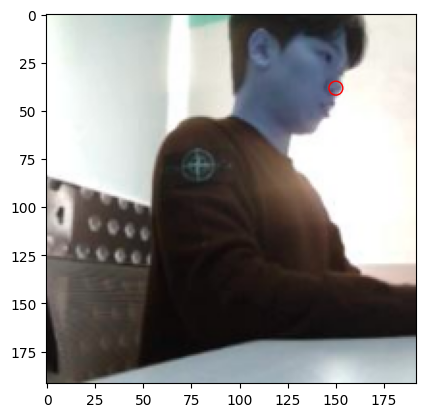

In [53]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_studying[f"{point_check}Y"][num]*192,keypoint_studying[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

In [54]:
body_part = [ 'left_eye_', 'right_eye_','left_ear_','right_ear_',
       'left_shoulder_', 'right_shoulder_', 'left_elbow_', 'right_elbow_',
        'left_wrist_',  'right_wrist_','nose_']

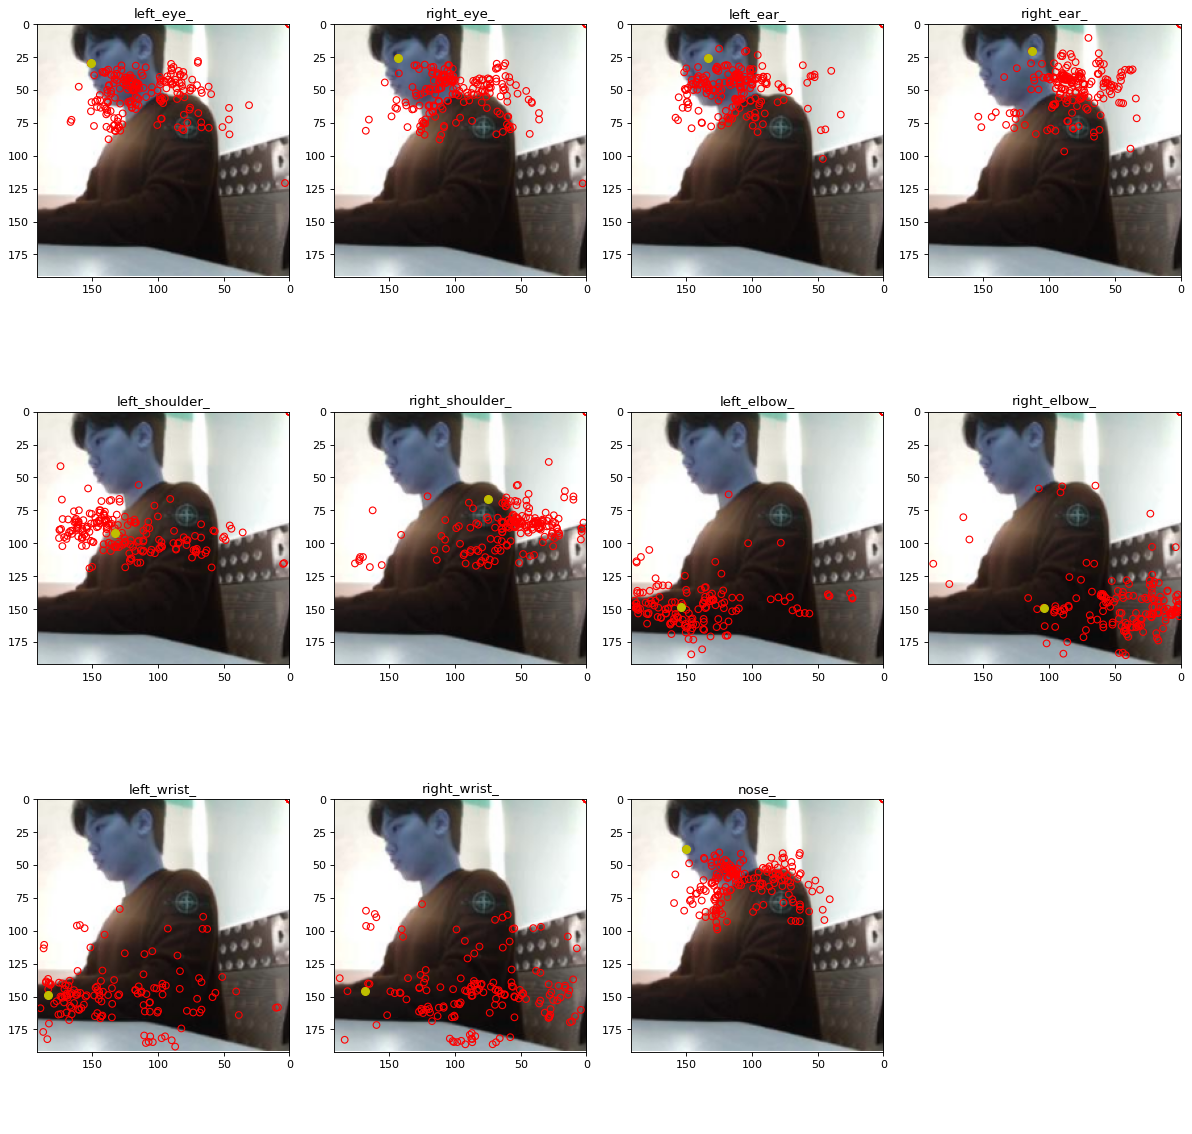

In [55]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"]*192,keypoint_studying[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"][num]*192,keypoint_studying[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


*------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [56]:
""" 딴짓 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_playing = pd.read_csv("keypoint_playing.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_playing

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.108453,0.188118,0.079799,0.211656,0.072383,0.147514,0.111604,0.208735,0.100037,0.060476,0.299707,0.170413,0.247274,0.023572,0.576063,0.216647,0.536024,0.012801,0.805590,0.238872,0.000000,0.000000
1,0.677465,0.812987,0.645498,0.844939,0.621500,0.806434,0.623116,0.827477,0.562600,0.719110,0.707358,0.740703,0.651252,0.582602,0.876349,0.847208,0.774261,0.665734,0.850941,0.847568,0.000000,0.000000
2,0.493904,0.655096,0.458492,0.666068,0.440419,0.639466,0.408038,0.583735,0.374983,0.523892,0.529728,0.453783,0.452533,0.339704,0.689443,0.689812,0.681518,0.679908,0.470226,0.968574,0.545615,0.622579
3,0.488518,0.659183,0.448053,0.668600,0.435872,0.642786,0.406165,0.586468,0.371677,0.520700,0.531398,0.475364,0.445127,0.344843,0.690067,0.685714,0.682127,0.683099,0.476008,0.954672,0.546921,0.704208
4,0.518924,0.253611,0.457504,0.294346,0.495686,0.209763,0.459310,0.399851,0.531502,0.187973,0.563458,0.604893,0.736397,0.213118,0.860854,0.871413,0.946775,0.156082,0.877447,0.564383,0.896257,0.212337
5,0.553532,0.767992,0.521302,0.812917,0.483023,0.723091,0.562090,0.827566,0.483776,0.619134,0.781247,0.837141,0.600639,0.419459,0.000000,0.000000,0.832865,0.304514,0.880838,0.840043,0.000000,0.000000
6,0.567160,0.772377,0.532129,0.819159,0.496190,0.727226,0.573438,0.838438,0.495357,0.624362,0.780162,0.841914,0.619077,0.432356,0.912381,0.857391,0.836751,0.326144,0.804373,0.854017,0.000000,0.000000
7,0.577874,0.222705,0.508602,0.266430,0.558014,0.159962,0.508914,0.352864,0.605288,0.139185,0.609449,0.538930,0.779733,0.191097,0.838100,0.633375,0.000000,0.000000,0.787380,0.444909,0.809726,0.174795
8,0.648063,0.832358,0.625380,0.861308,0.588104,0.821247,0.605320,0.829569,0.543221,0.720382,0.704349,0.733539,0.651838,0.615721,0.000000,0.000000,0.769850,0.667294,0.834654,0.838737,0.798201,0.807202
9,0.779818,0.913703,0.738182,0.923202,0.737141,0.925325,0.697135,0.810097,0.701856,0.820404,0.730289,0.712723,0.777352,0.702693,0.769442,0.719328,0.786394,0.692773,0.773474,0.799723,0.834282,0.842111


In [57]:
np.sum(keypoint_playing.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [58]:
keypoint_playing.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.441386,0.453894,0.383928,0.459806,0.383785,0.419623,0.332324,0.415909,0.357166,0.367087,0.432148,0.428365,0.473356,0.285719,0.452177,0.339053,0.493851,0.236512,0.296078,0.260622,0.293241,0.243450
std,0.240916,0.260215,0.238343,0.272967,0.241522,0.268928,0.226277,0.286896,0.221802,0.257513,0.279793,0.312688,0.262654,0.245638,0.417397,0.337380,0.409013,0.277454,0.352535,0.332988,0.347140,0.311115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.295852,0.308481,0.231183,0.326762,0.228351,0.230297,0.207089,0.191697,0.239242,0.177532,0.000000,0.000000,0.443960,0.057148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483645,0.482813,0.400867,0.485965,0.421878,0.442571,0.343727,0.429643,0.371677,0.354062,0.536830,0.476982,0.562188,0.246671,0.608196,0.335816,0.711514,0.049283,0.000000,0.000000,0.000000,0.000000
75%,0.603032,0.654452,0.551366,0.674534,0.541538,0.632652,0.477649,0.652092,0.492808,0.586559,0.631025,0.677868,0.646895,0.500773,0.852396,0.633112,0.848971,0.466957,0.634188,0.544981,0.610516,0.532525
max,0.989600,0.964626,0.986322,0.933762,0.978357,0.925903,0.808901,0.983447,0.975621,0.974538,0.942979,0.976363,0.974402,0.819519,0.982706,0.974703,0.981970,0.963244,0.955643,0.968574,0.966822,0.952260


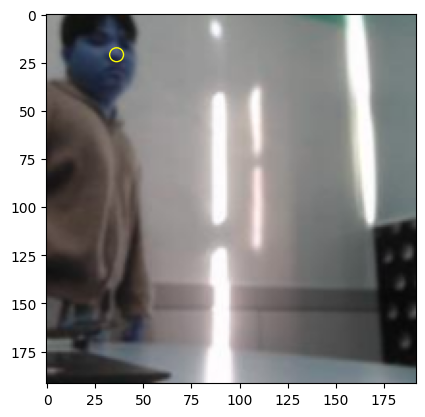

In [59]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_playing[f"{point_check}Y"][num]*192,keypoint_playing[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='yellow',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

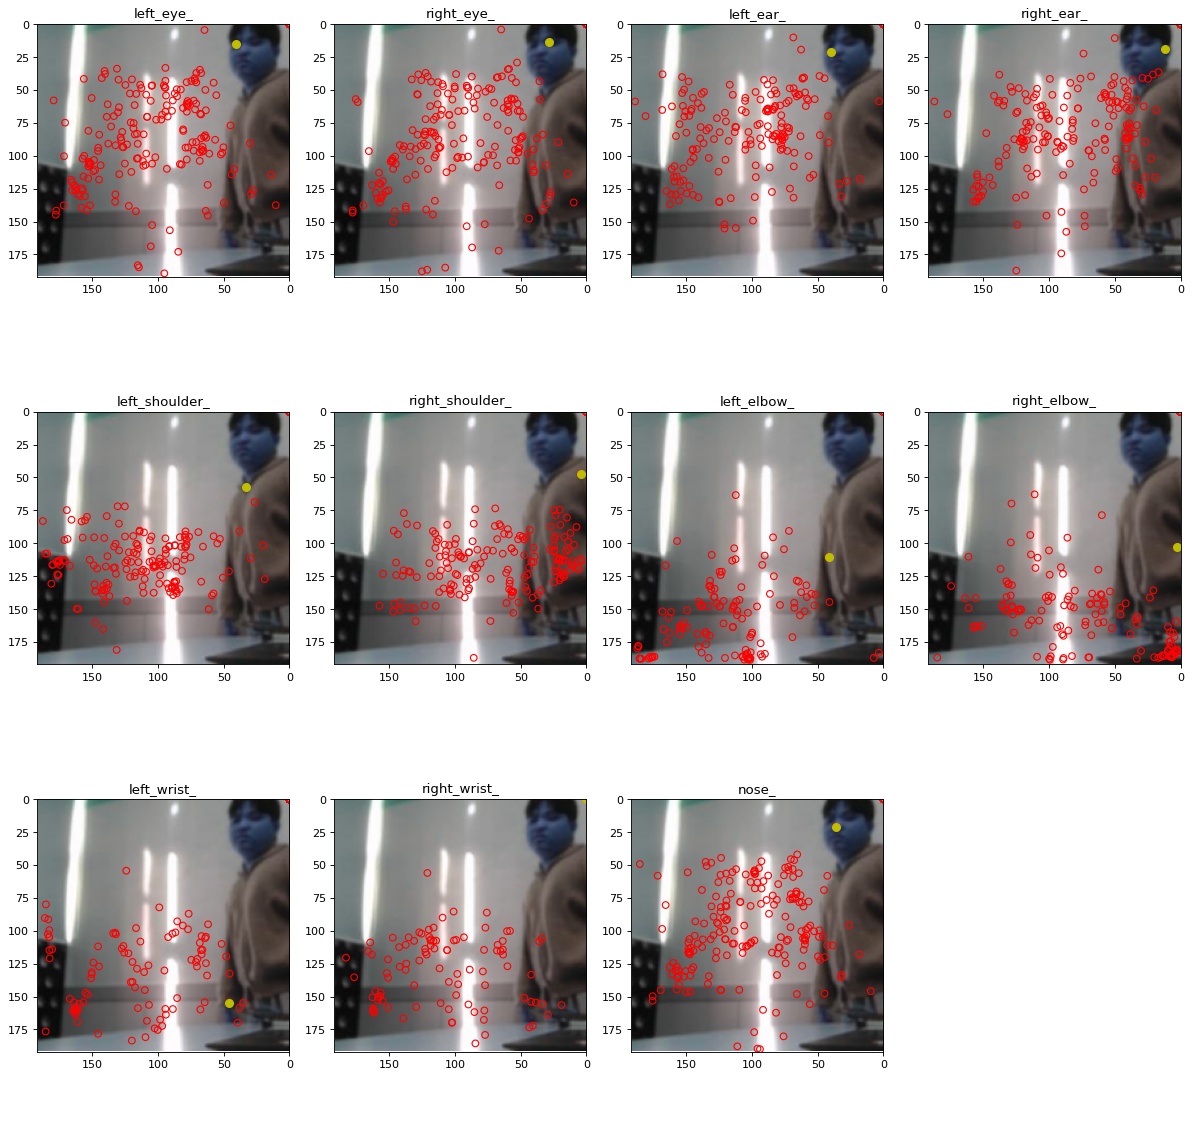

In [60]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"]*192,keypoint_playing[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"][num]*192,keypoint_playing[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


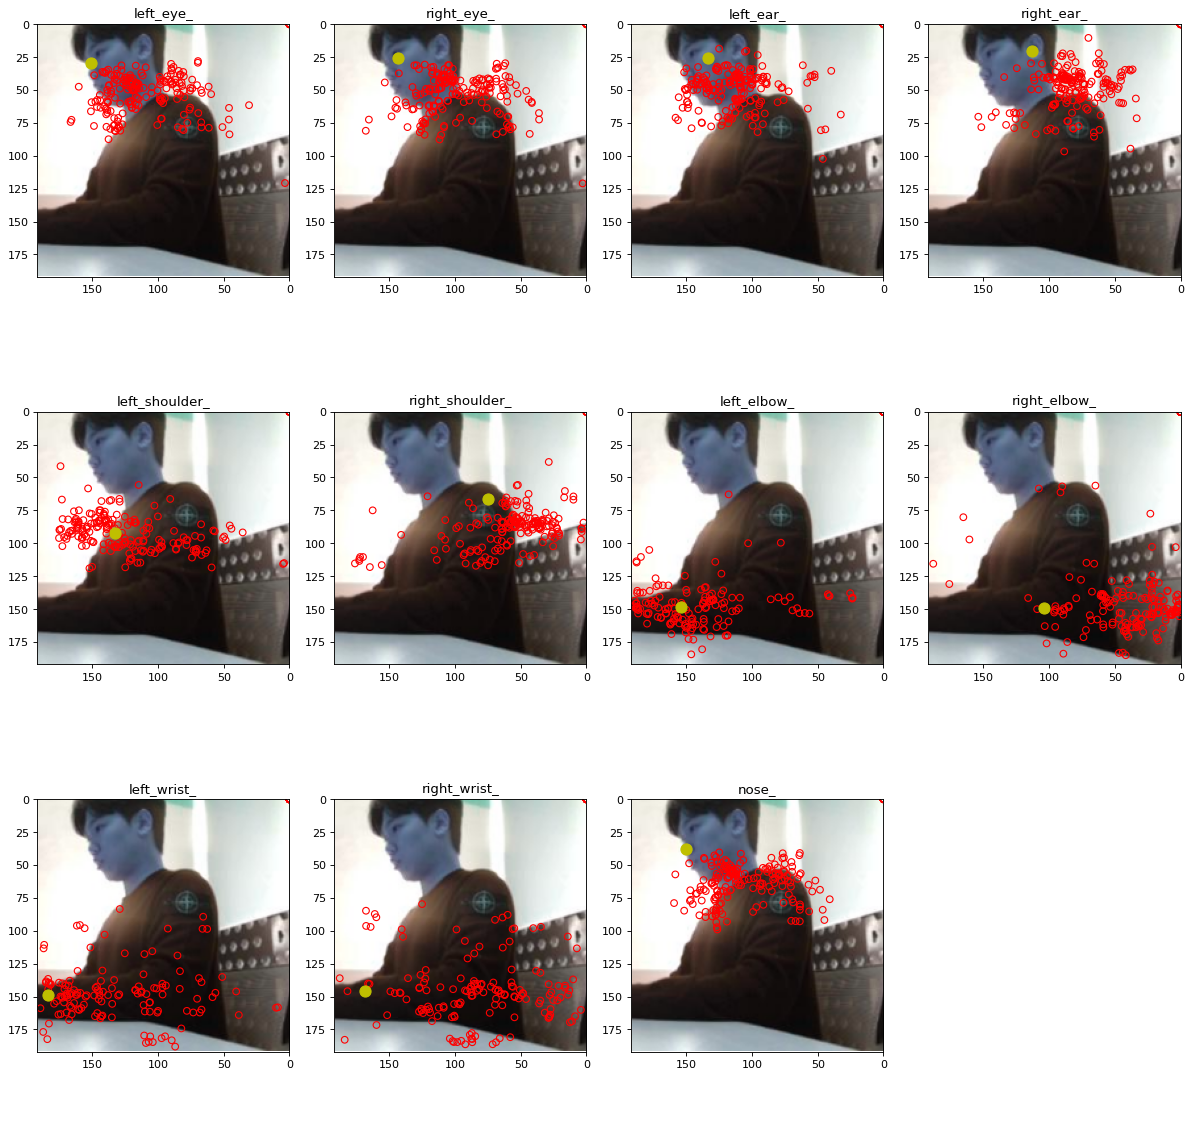

In [61]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"]*192,keypoint_studying[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"][num]*192,keypoint_studying[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=100, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


# 모델 만들기

In [62]:
"""공부,딴짓 포인트들을 keypoint 데이터 프레임으로 합쳐줌"""
keypoint_playing["label"] = 0  # 딴짓 중 lable = 0
keypoint_studying["label"] = 1 # 공부 중 lable = 1
keypoint = pd.concat([keypoint_playing,keypoint_studying],axis=0)
keypoint = keypoint.sample(frac=1).reset_index(drop=True)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
X = keypoint.iloc[:,:-1]
y = keypoint.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [74]:
model = SVC(kernel="rbf").fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

In [75]:
print('Score:', score)

Score: 0.8285714285714286


In [78]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[38 18]
 [29 20]]


In [79]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.975
Recall: 0.7959183673469388
F1 Score: 0.8764044943820225


# 실전 테스트

In [114]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import warnings

warnings.filterwarnings("ignore")

interpreter = tf.lite.Interpreter(model_path="lite-model_movenet_singlepose_lightning_3.tflite")
interpreter.allocate_tensors()

In [122]:
cap = cv2.VideoCapture(0)
interval = 0
while cap.isOpened():
    data = []
    ret, frame = cap.read()
    if interval % 100 == 0:
        # Reshape image
        img = frame.copy()
        img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
        input_image = tf.cast(img, dtype=tf.float32)

        # Setup input and output 
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Make predictions 
        interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
        interpreter.invoke()
        keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

            
        point_cnt = 0  # 관절수 카운트
        for keypoints_with_score in keypoints_with_scores[0][0][:11]:
            for ax in range(2):
                data.append(keypoints_with_score[:2][ax])
                if (keypoints_with_score[2]> 0.1):# 0.1 이하는 point 감지 못 한 것으로 간주
                    point_cnt += 1
            
        # 모델 테스트
        data = np.array(data)
        state = model.predict(data.reshape(1, -1))
        print(point_cnt)
        if point_cnt >= 12 :   #  2개(x,y좌표) * 3(최소 3관절 이상) * 2(오른쪽,왼쪽)
            if state == 1 : 
                print("공부 중")
            elif state == 0 : 
                print("딴짓 중")
        else : print("딴짓 중 _ 관절수 부족")
            
        interval = 0         
    interval += 1 

    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

20
공부 중
22
딴짓 중
22
공부 중
22
공부 중
22
공부 중
22
딴짓 중
10
딴짓 중 _ 관절수 부족
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
딴짓 중
22
공부 중
22
공부 중
20
공부 중
22
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
공부 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
공부 중
22
딴짓 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
20
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
공부 중
22
딴짓 중
20
딴짓 중
12
공부 중
18
공부 중
0
딴짓 중 _ 관절수 부족
14
공부 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
18
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
22
딴짓 중
22
딴짓 중
20
딴짓 중
20
딴짓 중
16
딴짓 중
16
딴짓 중
18
딴짓 중
18
딴짓 중

KeyboardInterrupt: 